# Data Intelligence Exam
### IT University of Copenhagen - Spring semester 2022
Student Inna Tarasyuk | inta@itu.dk | 01/06/2022 || Teacher: Jens Gwen Stein | jeej@itu.dk || Course code: BBDAINT1KU

## Introduction

In this paper, I will conduct a data analysis on the provided dataset "employee-data.csv". I will first explore the dataset by obtaining summary statistics to get a sense of what the data holds. Based on the data, I will pose a question and form an intital hypothesis. Next, I will prepare the data for the analysis by cleaning and transforming it in the appropriate form. After the data is preprocessed, I will create a model with the aim of validating or falsifying my hypothesis. Depending on my findings in the analysis section, I will discuss the results and potentially revise my hypothesis. In the end, I will draw a conclusion.

Throughout the paper, I will also visualize the data as "visualizations are especially useful for this in the early stages of analysis."(Grant, 2019; p.6). This will strengthen the grasp of the data.

### Prerequisites (libraries/packages)

First I will import python libraries that enable me to manipulate with the data efficiently. When importing packages I will use standard shorthands.

**NumPy**: 
ibrary that offers comprehensive mathematical functions and facilitates working with arrays flexibly

I might need to use NumPy in the analysis section for setting a random state.

**Pandas**: 
package that provides fast and flexible data structures and makes data cleaning and analysis relatively simple

In this paper, I use Pandas for loading the data into a dataframe to make it comfortable to work with the given dataset.

**Matplotlib**:
a plotting library which is used to perform visualizations of the data

Matplotlib is used in the data visualization section. 

**Seaborn**:
a visualization library which is based on Matplotlib and enables creating descriptive statistical graphs

Seaborn is used to perform visualizations throughout the paper.

**Sklearn**: 
library that contains a lot of efficient tools for machine learning and statistical modeling, including classification, regression, and clustering tools which I will apply in the analysis section.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #for splitting the data
import sklearn.ensemble
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier # for building the model
from sklearn.metrics import accuracy_score

## Data loading and summary statistics 

In the following section, I will explore the dataset in question and do some summary statistics to get an initial understanding of it.

From opening the file in the textreader we can tell that it is a csv file. To work with it efficiently, I will load the data into a Pandas Dataframe using the read_csv() function and view first and last 5 rows of it.

In [2]:
def load_data(path):
    return pd.read_csv(path)

In [280]:
# Load a dataset into a dataframe and view first and last 5 rows of it
df = load_data("employee-data.csv")
df

,age,attrition,business-travel,department,distance-from-home,education,education-field,employee-number,environment-satisfaction,gender,...,last-salary-increase-percentage,performance-rating,relationship-satisfaction,stock-option-level,total-working-years,work-life-balance,years-at-company,years-in-current-role,years-since-last-promotion,years-with-current-manager
0,41.0,Yes,Travel_Rarely,Sales,1.0,2.0,Life Sciences,1.0,2.0,Female,...,11.0,3.0,1.0,0.0,8.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,Research & Development,8.0,1.0,Life Sciences,2.0,3.0,Male,...,23.0,4.0,4.0,1.0,10.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,Research & Development,2.0,2.0,Other,4.0,4.0,Male,...,15.0,3.0,2.0,0.0,7.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,Research & Development,3.0,4.0,Life Sciences,5.0,4.0,Female,...,11.0,3.0,3.0,0.0,8.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,Research & Development,2.0,1.0,Medical,7.0,1.0,Male,...,12.0,3.0,4.0,1.0,6.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Travel_Frequently,Research & Development,23.0,2.0,Medical,2061.0,3.0,Male,...,17.0,3.0,3.0,1.0,17.0,3.0,5.0,2.0,0.0,3.0
1466,39.0,No,Travel_Rarely,Research & Development,6.0,1.0,NaN,2062.0,4.0,Male,...,15.0,3.0,1.0,1.0,9.0,3.0,7.0,7.0,1.0,7.0
1467,27.0,No,Travel_Rarely,Research & Development,4.0,3.0,Life Sciences,2064.0,2.0,Male,...,20.0,4.0,2.0,1.0,6.0,3.0,6.0,2.0,0.0,3.0
1468,49.0,No,Travel_Frequently,Sales,2.0,3.0,Medical,2065.0,4.0,Male,...,14.0,3.0,4.0,0.0,17.0,2.0,9.0,6.0,0.0,8.0


From the above dataframe, I observe that there are 1470 observations, and each row contains 28 features that will be further investigated.

After constructing a dataframe from the data, I first inspect the dataset for the presence of duplicated rows. If it contains those, I will need to drop them since they indicate human errors during data collection/recording and therefore do not hold useful information but might mess up the basic summary statistics that will be obtained later on.

In [4]:
# Check if the dataset has the duplicated rows
df[df.duplicated(keep=False)]

,age,attrition,business-travel,department,distance-from-home,education,education-field,employee-number,environment-satisfaction,gender,...,last-salary-increase-percentage,performance-rating,relationship-satisfaction,stock-option-level,total-working-years,work-life-balance,years-at-company,years-in-current-role,years-since-last-promotion,years-with-current-manager


Since there are no duplicates in the dataset, I keep it unchanged.

In the cell below, I get basic information about columns: their names, data type of each column and null values per column.

In [5]:
# Find out the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1457 non-null   float64
 1   attrition                        1461 non-null   object 
 2   business-travel                  1464 non-null   object 
 3   department                       1465 non-null   object 
 4   distance-from-home               1462 non-null   float64
 5   education                        1459 non-null   float64
 6   education-field                  1462 non-null   object 
 7   employee-number                  1464 non-null   float64
 8   environment-satisfaction         1464 non-null   float64
 9   gender                           1460 non-null   object 
 10  job-involvement                  1460 non-null   float64
 11  job-level                        1464 non-null   float64
 12  job-role            

Since the dataset has 1470 entries, the columns with less entries than 1470 have missing values. I thus conclude that each column lacks values.

In the next two cells, I get descriptive statistics of those columns which have numeric data types and visualize them on a box plot. It will give me information about the values range and some other statistics about the feature that I will further use in the description section. 

In [7]:
df.describe()

,age,distance-from-home,education,employee-number,environment-satisfaction,job-involvement,job-level,job-satisfaction,monthly-income,number-of-companies-worked-at,last-salary-increase-percentage,performance-rating,relationship-satisfaction,stock-option-level,total-working-years,work-life-balance,years-at-company,years-in-current-role,years-since-last-promotion,years-with-current-manager
count,1457.000000,1462.000000,1459.000000,1464.000000,1464.000000,1460.000000,1464.000000,1459.000000,1457.000000,1461.000000,1459.000000,1461.000000,1464.000000,1466.000000,1461.000000,1459.000000,1461.00000,1460.000000,1467.000000,1460.000000
mean,36.923130,9.175103,2.914325,1024.454918,2.721995,2.729452,2.064891,2.728581,6502.233356,2.682409,15.196710,3.153320,2.709699,0.793315,11.275154,2.760795,7.03217,4.229452,2.187457,4.127397
std,9.142019,8.106798,1.023821,601.947388,1.093025,0.711279,1.108235,1.101974,4701.966124,2.484836,3.653976,0.360419,1.081638,0.852371,7.781405,0.707358,6.13621,3.627642,3.222263,3.566878
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,490.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,3.00000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4930.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,5.00000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.250000,4.000000,3.000000,3.000000,4.000000,8380.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,10.00000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,4.000000,40.00000,18.000000,15.000000,17.000000


<AxesSubplot:>

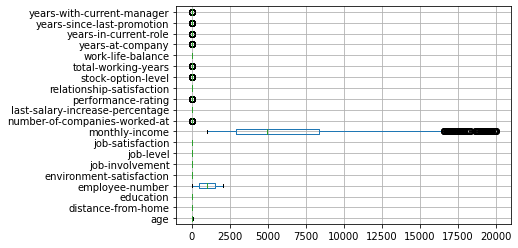

In [8]:
df.boxplot(vert=False)

I observe that there are 20 features containing values as float data types. From the above box plot we can hardly see any valuable information apart from the fact that range of most columns fluctuates around zero (except the "monthly-income" feature that reaches the value of nearly 20000 and the "employee-number" column with the highest number of around 2100). Since many variables vary a little, I can suggest that most of them are ordinal variables.

To get a basic overview of values in the columns, I create the get_column_values function. Since it is more convenient to analyze the sorted array of numeric values rather than unsorted, I also apply the sorted function to those columns that hold numeric data. 

In [69]:
def get_column_values(dataframe, column, is_numeric):
    print ("Column name: ", column)
    values = dataframe[column].unique()
    size = len(values)
    values = sorted(values) if (is_numeric and size < 100) else values
    print("Unique values: ", values)

To make the above function work properly, I need an auxilary function that determines whether a column contains numeric data or not and returns an array of boolean values as a mask (each value in the returned array states if the condition is met for the particular column). 

In [56]:
def is_numeric(dataframe):
    is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
    return is_number(df.dtypes)

Then I apply the created function to my dataset to get the array of boolean values.

In [71]:
numeric = is_numeric(df)
numeric

array([ True, False, False, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Below I iterate through the columns in the dataset and print the basic information about each column. In the next section I will use this information to describe the columns that the dataset contains. 

In [70]:
i = 0
for column in df:
    get_column_values(df, column, numeric[i])
    i += 1
    print()

Column name:  age
Unique values:  [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, nan, 60.0]

Column name:  attrition
Unique values:  ['Yes' 'No' nan]

Column name:  business-travel
Unique values:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]

Column name:  department
Unique values:  ['Sales' 'Research & Development' 'Human Resources' nan]

Column name:  distance-from-home
Unique values:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, nan]

Column name:  education
Unique values:  [1.0, 2.0, 3.0, 4.0, nan, 5.0]

Column name:  education-field
Unique values:  ['Life Sciences' 'Other' 'Medical' nan 'Marketing' 'Technical Degree'
 'Human Resources']

Column name:

## Description of the data

In this section, I will describe the given dataset (employee-data.csv) by analyzing the data itself, its size, and its type in order to get a sense of what the data holds, and what the context it is placed in.

The given dataset comprises 1470 observations with 28 columns. Each observation consists of the data about an employee of the company. The source of the dataset is not given, but I assume that the dataset was either scraped from or exported from a database of an employment website that contains the data on the staff of a specific company.

The dataset contains the following columns:


**0. age** 

The column represents an age of an employee and ranges between 18 to 60.

type: float64

**1. attrition**

The attrition column presents a binary variable that indicates whether an employee has left the company. 

type: object

**2. business-travel**

The column presents a categorical variable that shows the frequency of employee's traveling (non-travel, rarely travel, or frequently travel)

type: object

**3. department**

The column contains nominal category-variables that gives information about department of an employee ('Sales', 'Research & Development', 'Human Resources')

type: object

**4. distance-from-home**

The column shows how far this employee lives from their workplace. The variable ranges from 1 to 29.

type: float64

**5. education**

The column represents the level of education of the employee and ranges from 1, lowest, to 5, highest.

type: float64

**6. education-field**

The column contains nominal variables that gives information about the education field of the employee. The feature is classified into 6 categories: 'Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other'

type: object

**7. employee-number**

The column gives an internal id number to each of the employee.

type: float64

**8 & 13 & 20. environment-satisfaction & job-satisfaction & relationship-satisfaction**

There are three columns containing ordinal variables which describe the level of satisfaction with the work environment/job/ their family relationship. The columns have 4 categories: from 1, lowest, to 4, highest

type: float64

**9. gender**

The gender column is a nominal variable that gives information about the gender of the employee("Male" or "Female").

type: object

**10. job-involvement**

The job involvement column contains ordinal variables that desribe the level of involvement; ranges from 1, lowest, to 4, highest

type: float64

**11. job-level**

The job-level column is also an ordinal variable that indicates the relative level or seniority of this employee's job. The values range from 1 to 5, indicating the level of employee's job.

type: float64

**12. job-role**

The job role column contains nominal variables which describe the role. The feature is classified into 9 categories:  'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'

type: object

**14. marial-status**

The column is a nominal variable that has 3 categories: "Single", "Married", "Divorced"

type: object

**15. monthly-income**

The monthly income column is a numeric variable that ranges from 1009.0 to 19999.0 and is represented as float values.

type: float64

**16. number-of-companies-worked-at**

The column gives information about the number of companies the employee has worked at. The values range from 0 to 9. 

**17. over-time**

The over time column is a binary variable that provides information about whether or not the employee regularly works overtime. 

type: object

**18. last-salary-increase-percentage**

The column indicates the percentage of last salary increase. The values range from 11 to 25. 

type: float64

**19. performance-rating**

The column describes how this employee is rated by their manager. 

type: float64

**21. stock-option-level**

The column is an ordinal variable that shows how many options relatively the employee has in their company, from 0, lowest, to 3, highest

type: float64


**22. total-working-years**

The column contains numeric variables in form of discrete values (which can be counted). The values range from 0 to 40 years of work.

type: float64

**23. work-life-balance**

The column contains ordinal variables, indicating how good the work-life balance the employee has. It has 4 categories: from 1, lowest, to 4, highest.

type: float64

**24. years-at-company**

The column shows hom many years the employee has been working in the company. It is a numeric variable that ranges from 0 to 40 years.

type: float64

**25. years-in-current-role**

The column is a numeric variable that represents the number of years the employee has been working in the current role. The values range from 0 to 18. 

type: float64

**26. years-since-last-promotion**

The column contains numeric variables which describe how long it has been since the employee has been promoted. The values range from 0 to 15 years.

type: float64

**27. years-with-current-manager**

The column is a numeric variable that indicates the number of years the employee has been working with the current manager and ranges from 0 to 17.

type: float64

## Research question and hypothesis

Investigating the dataset has raised the question which factors have the highest influence on the attrition variable. 

The high staff turnover is regarded as a key issue for many companies since it may have a negative impact on company’s performance. Therefore knowing the main factors that affect the employee attrition rate could be extremely helpful for the leader of the company as it may enable him to take relevant measures to reduce it.

Since employee-number is unique to individuals itself, and can therefore not be generalized, I will not consider this feature for including in my model. Other features may take place in my model but I will focus my analysis on determining main variables out of all that give the best prediction of the target variable.

First, I expect monthly income to be leading cause of turnover as people tend to leave their current companies for those that offer higher salaries and give more career opportunities. I also assume income is highly correlated with job level and will therefore choose not to include the latter feature in the model, even though it may have impact on the target variable.

Additionally, I suppose that environment satisfaction has also a high influence on the attrition rate since if a person is surrounded by good company culture and various facilities, he is less likely to quit. I do suppose that the environment satisfaction has a high correlation with job satisfaction and therefore the latter one will not be included in my intital model. However, it will be interesting to see whether two those features have approximately the same influence on the staff turnover. 

Finally, based on my knowledge, I assume that young people are more likely to change jobs as they are looking for the one that suits their ambitions, whereas older people are usually more conservative in terms of changes and do not want to resign until there is a strong reason for it. 

Hence, my initial hypothesis is that monthly income, environment satisfaction, and age are main features that indicate whether the employee will leave a job. 

# Data pre-processing

Before applying any machine learning algorithms, I should first transform the data into a format that is easier and effectively processed. Pre-processing involves several steps: data cleaning, namely handling missing or irrelevant parts of the data, transformation of the data in appropriate forms if it is needed, and potentially data reduction. 

In the section below, I take a look at the diversity of values for features, which I have selected as predictors in my model, visualize some of them to facilitate a better grasp of the data, and handle the missing values either by filling in them with some more carefully chosen candidates or by dropping them. 

### Data vizualization

According to Robert Grant, "Visualizing is not only useful for communicating messages, but also
for the analyst to understand their data in depth." (2019: 6). Hence, I'm going to vizualize the target and the predictors in my model using the seaborn and matplotlib libraries.

To visualize the distribution of a monthly income I will plot a histogram and a box plot. 

<AxesSubplot:ylabel='Frequency'>

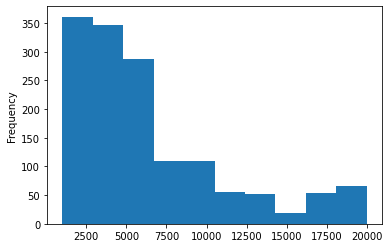

In [200]:
# Plot the monthly-income column as a histogram
df["monthly-income"].plot.hist()

<AxesSubplot:xlabel='monthly-income', ylabel='Count'>

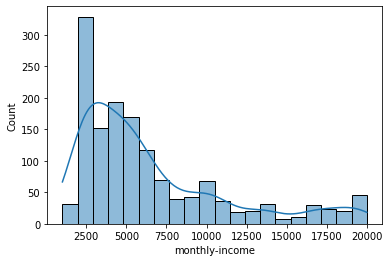

In [201]:
sns.histplot(df["monthly-income"], kde=True)

I can observe that the shape of monthly income distribution clearly resembles a log-normal shape with the majority of values under 10.000 and the highest value of almost 20.000.

To get a better understanding of the distribution and detect outliers in the data, I will also plot a box plot. 

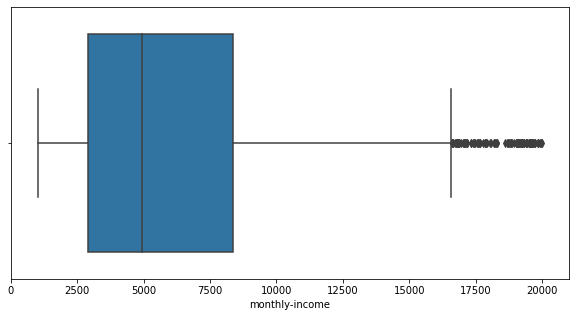

In [202]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 21000)
sns.boxplot(x=df['monthly-income'])
plt.show()

From the above box plot one can see that the median is around 5000, and the greatest value is around 17.000. The visualization also shows that there are data points that differ dramatically from all others. These values could cause anomalies in the results obtained through applying machine learning algorithms. However, even though the outliers can potentially reduce the accuracy of the model, they might still be valid data points. Therefore, to decide on whether to remove them or replace them with meaningful value (the 95 percentile, for instance), I will first look at the percentage of extreme points from the entire dataset. In case the percentage is too big, I assume capping outliers at a maximum value is more reasonable.

#### Handling outliers

To find the exact value exceeding which data points can be treated as outliers, I create a function that returns the 95th percentile.

In [203]:
# function returns the 95th percentile
def highest_five_percent(dataframe, column):
    return dataframe[column].quantile(0.95)

In [281]:
highest_five_percent(df, 'monthly-income')

17794.400000000005

After that, I calculate the percentage of points exceeding the maximum value from the entire dataset.

In [205]:
len(df[df['monthly-income'] > 17794.4])/ len(df)

0.04965986394557823

Since the outliers make up less than 0.5% of the data, I will choose to drop these data points.

In [282]:
df = df[df['monthly-income'] <= 17794.4]

#### Further visualization

Since the environment satisfaction is an ordinal variable, to visualize it I will make a bar plot. The feature has 4 different values each of those is represented by the length of each bar.

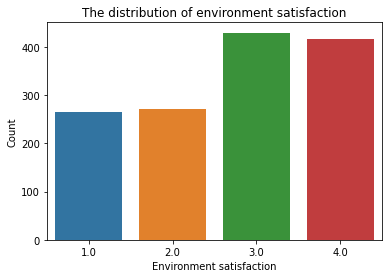

In [207]:
barchart = sns.countplot(x=df["environment-satisfaction"], data=df)
barchart.set_xlabel('Environment satisfaction')
barchart.set_ylabel('Count')
barchart.set_title('The distribution of environment satisfaction')
plt.show()

The visualization above shows that more people are rather satisfied with their work environment (the figures for 3.0 or 4.0 are higher than those for 1.0 and 2.0).

<AxesSubplot:xlabel='age', ylabel='Count'>

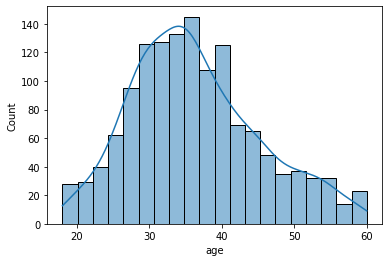

In [208]:
sns.histplot(df["age"], kde=True)

The histogram above shows the distribution of age in the dataset. Judging from the shape of the figure, the values are normally distributed and range from 18 to 60.

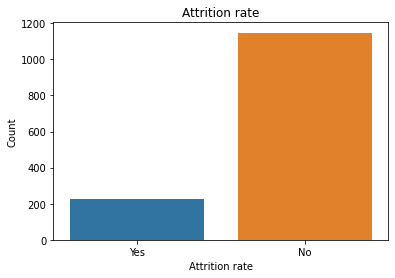

In [209]:
barchart = sns.countplot(x=df["attrition"], data=df)
barchart.set_xlabel('Attrition rate')
barchart.set_ylabel('Count')
barchart.set_title('Attrition rate')
plt.show()

The bar plot depicts the number of people who have left their company and the figure for those who have not. Plotting the data shows, that there are less than 250 people, who have quit their job, and more than 1100 people, who have stayed at their company. 

#### Correlations between variables

In the following cell I built correlation matrix, each point of which shows the correlation between two given variables.

<AxesSubplot:>

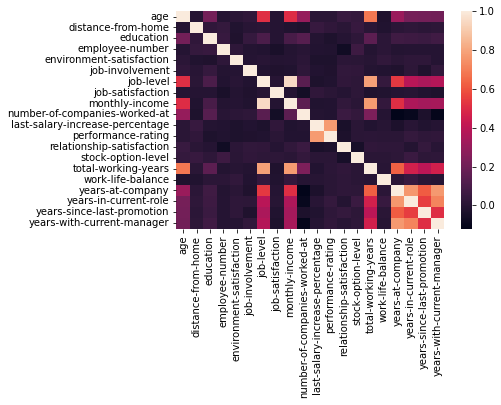

In [72]:
sns.heatmap(df.corr())

From the heatmap below one can see that there is a high correlation between job level and monthly income which further supports my decision to include only one of those values in my prediction model. However, contrary to my assumption, heatmap shows rather a low correlation between environmental satisfaction and job satisfaction (but still we should take into account that .corr() gives us very basic linear correlations so we cannot conclude that there is not a relationship judging from the measurement close to zero).

### Handling missing values

In the following section, I will handle missing data by applying different strategies depending on a type and importance of a feature I'm working with. 

To get the information about missing values in a specific column, I create a function that takes a column and returns the number of missing values alongside the indices of rows that lack value.

In [134]:
def get_info_about_missing_values(dataframe, column):
    # find specific rows that are missing data on the specific column
    mask = dataframe[column].isna()
    print("The number of missing values:", len(dataframe[mask]))
    return dataframe[mask][column]

Additionally, I make a function that takes a specific column and returns the percentage of missing values from the entire dataset. It may come in handy when I will decide on whether to drop values or fill them with a meaningful value since in case the percentage is too big, it will be more reasonable to choose the second approach.

In [ ]:
def percentage_of_missing_values(dataframe, column):
    return len(df.index[dataframe[column].isna()].tolist())/ len(dataframe)

First, I inspect the target variable for the presence of missing values.

In [210]:
get_info_about_missing_values(df, "attrition")

The number of missing values: 9


320     NaN
587     NaN
816     NaN
1045    NaN
1055    NaN
1171    NaN
1250    NaN
1262    NaN
1337    NaN
Name: attrition, dtype: object

In [211]:
print("Percentage of missing values:", percentage_of_missing_values(df, "attrition"))
print("Size of the whole dataset:", len(df))

Percentage of missing values: 0.006502890173410405
Size of the whole dataset: 1384


There are 9 out of 1384 data points that lack value on the attrition column which is less than 0.7% from the whole dataset. Since this feature is the target variable, it is crucial for the accurate prediction to know precise values for all rows that I will include in my prediction model. Therefore, I create a function that removes rows with missing data.

In [157]:
def drop_missing_values(dataframe, column):
    idc = df.index[dataframe[column].isna()].tolist()
    return dataframe.drop(labels=idc, axis=0)

In [283]:
df = drop_missing_values(df, "attrition")

In [216]:
# Total percentage of missing values 
sum(df.isna().sum())/len(df)

0.15418181818181817

In [214]:
# Provides the number of null values within each column
df.isna().sum()

age                                11
attrition                           0
business-travel                     6
department                          5
distance-from-home                  8
education                          11
education-field                     8
employee-number                     6
environment-satisfaction            6
gender                             10
job-involvement                     9
job-level                           6
job-role                            5
job-satisfaction                   10
marial-status                      10
monthly-income                      0
number-of-companies-worked-at       9
over-time                          12
last-salary-increase-percentage    11
performance-rating                  9
relationship-satisfaction           6
stock-option-level                  4
total-working-years                 9
work-life-balance                  11
years-at-company                    9
years-in-current-role               8
years-since-

Using the previous code snippet, I can see the amount of missing values in each column in the dataframe. 

I observe that there are 11 and 6 missing values for the age and environment satisfaction columns respectively. Since I will be using those columns as predictors in my model, I will need to eliminate or replace the missing values.

To choose the approach, I need to check the percentage that missing values within those two columns make up from the entire dataset.

In [218]:
percentage_of_missing_values(df, "age") + percentage_of_missing_values(df, "environment-satisfaction")

0.012363636363636365

In [221]:
df.index[df["age"].isna() & df["environment-satisfaction"].isna()].tolist()

[]

Since the percentage is roughly 1%, I will choose to remove those rows that lack values.

In [284]:
df = drop_missing_values(df, "age")
df = drop_missing_values(df, "environment-satisfaction")

In [224]:
df.shape

(1358, 28)

In this section, I have pre-processed all data I plan to use throughout my analysis. By handling missing data and removing outliers, I have ended up with 1358 data points compared to 1470 data points on import.

## Data analysis

In this section, I will use the machine learning algorithms to find important features that affect the employee attrition. Therefore I will build a model, namely the Random Forest, to validate my hypothesis. 

The Random Forest selects the best result by combining multiple decision trees. I have decided to utilize this model as it can directly calculate the importance of each variable, and based on the results, I will be able to test my assumptions about the chosen features.

After building the model I will interpret the results by evaluating the performance of model.

#### Splitting the data into training sets and test sets
Below I create a function that splits my data into training and testing sets. I also set the random state to be equal to 0 to ensure results comparability.

In [225]:
# Splitting the data into training sets and test sets
def split_data(dataframe, predictors, target, test_size=0.1):
    X = dataframe[predictors]
    y = dataframe[target]
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
    test_size=test_size, random_state=np.random.RandomState(0))
    return X_train, X_test, y_train, y_test

#### Random Forest Model
In the following cell I build Random Forest Model and print out accuracy, precision, recall, f1-score and the feature importances.

In [287]:
# Random Forest model
def random_forest_classification(dataframe, X, y):
    rng = np.random.RandomState(0)
    input_features = X
    X_train, X_test, y_train, y_test = split_data(dataframe, input_features, y)
    model = sklearn.ensemble.RandomForestClassifier(random_state=rng)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    feature_importances = "\n\t".join(f"{feature}: {importance:.2f}" for feature, importance in zip(input_features, model.feature_importances_))
    print(f"Feature importances:\n\t{feature_importances}\n")
    print(sklearn.metrics.classification_report(y_test, preds))
    return (model, model.feature_importances_)

In [288]:
model, feature_importances = random_forest_classification(df.copy(), ["age", "monthly-income", "environment-satisfaction"], "attrition")
model

Feature importances:
	age: 0.31
	monthly-income: 0.62
	environment-satisfaction: 0.06

              precision    recall  f1-score   support

          No       0.81      0.90      0.85       111
         Yes       0.15      0.08      0.11        25

    accuracy                           0.75       136
   macro avg       0.48      0.49      0.48       136
weighted avg       0.69      0.75      0.72       136



RandomForestClassifier(random_state=RandomState(MT19937) at 0x2868E4740)

#### Visualization

To perform visualization of the obtained result, I use a bar plot.

Plotting the data shows feature importances of the model as the blue bars.

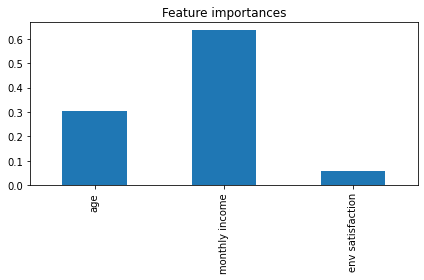

In [278]:
forest_importances = pd.Series(feature_importances, index=["age", "monthly income", "env satisfaction"])

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

## Evaluation

The accuracy in a random forest model reflects how many predictions were correct, dividing the number of correct predictions by the total number of predictions.

Running the random forest model using the attrition as the target value and 3 features (age, monthly income, and environment satisfaction) as predictors results in a pretty accurrate model with an accuracy of 75%. I can thus conclude that my assumption that monthly income, age, and environment satisfaction predict whether the epmloyee will resign is rather reasonable. However, plotting and printing the results tell that importance of environment satisfaction is only 6% that is rather small compared to 62% and 31% figures for the income and the age.

Therefore, I want to explore the possibility of a better than environment satisfaction predictor present in the dataset, and I will additionally build models and observe variations in results from replacing the environment satisfaction variable with another feature in my model. 

## Revise hypothesis
In the following section, I will further explore the metrics of models built by replacing the third predictor with other relevant features from the dataset.

#### Handling missing values

Before applying the algorithm of random forest, I need to handle missing values in all features that I want to include in the model. I want to test how well random forests perform with the following features as a third predictor: 
- "job-satisfaction"
- "distance-from-home"
- "number-of-companies-worked-at" 

As I have done before, I first inspect the percentage of missing values within the chosen feature from the entire dataset.

In [247]:
js = percentage_of_missing_values(df, "job-satisfaction")
js

0.007363770250368188

In [248]:
dfh = percentage_of_missing_values(df, "distance-from-home")
dfh

0.005891016200294551

In [251]:
num_companies = percentage_of_missing_values(df, "number-of-companies-worked-at")
num_companies

0.0066273932253313695

In [252]:
js + dfh + num_companies

0.019882179675994108

In [253]:
df.index[df["job-satisfaction"].isna()&df["distance-from-home"].isna()&df["number-of-companies-worked-at"].isna()].tolist()

[]

I observe that missing values within three chosen features make up approximately 2% out of all data points in total. Therefore, I can eliminate missing values by applying the drop_missing_values function, defined in the previous section. 

In [254]:
df = drop_missing_values(df, "job-satisfaction")
df = drop_missing_values(df, "distance-from-home")
df = drop_missing_values(df, "number-of-companies-worked-at")
df.shape

(1331, 28)

By handling missing data, I have ended up with 1331 data points compared to 1358 data points for the previous section.

#### Random Forest Models

In [263]:
model_v2, importances_v2 = random_forest_classification(df.copy(), ["age", "monthly-income", "distance-from-home"], "attrition")
model_v2

Feature importances:
	age: 0.29
	monthly-income: 0.49
	distance-from-home: 0.22

              precision    recall  f1-score   support

          No       0.92      0.95      0.93       119
         Yes       0.45      0.33      0.38        15

    accuracy                           0.88       134
   macro avg       0.69      0.64      0.66       134
weighted avg       0.87      0.88      0.87       134



RandomForestClassifier(random_state=RandomState(MT19937) at 0x2859B8D40)

In [264]:
model_v3, importances_v3 = random_forest_classification(df.copy(), ["age", "monthly-income", "job-satisfaction"], "attrition")
model_v3

Feature importances:
	age: 0.30
	monthly-income: 0.65
	job-satisfaction: 0.06

              precision    recall  f1-score   support

          No       0.92      0.94      0.93       119
         Yes       0.42      0.33      0.37        15

    accuracy                           0.87       134
   macro avg       0.67      0.64      0.65       134
weighted avg       0.86      0.87      0.87       134



RandomForestClassifier(random_state=RandomState(MT19937) at 0x2859B8E40)

In [265]:
model_v4, importances_v4 = random_forest_classification(df.copy(), ["age", "monthly-income", "number-of-companies-worked-at"], "attrition")
model_v4

Feature importances:
	age: 0.29
	monthly-income: 0.61
	number-of-companies-worked-at: 0.10

              precision    recall  f1-score   support

          No       0.90      0.95      0.92       119
         Yes       0.25      0.13      0.17        15

    accuracy                           0.86       134
   macro avg       0.57      0.54      0.55       134
weighted avg       0.82      0.86      0.84       134



RandomForestClassifier(random_state=RandomState(MT19937) at 0x2868E4040)

#### Visualizations

To perform visualizations for the obtained results, I will make bar plots where the bar's length represents the percentage of importance of the corresponding feature in prediction.

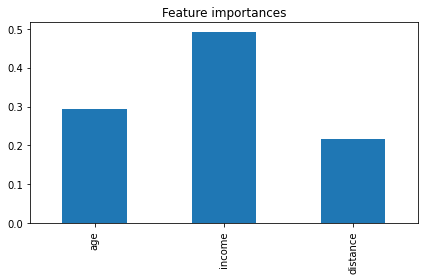

In [275]:
barplot_v2 = pd.Series(importances_v2, index=["age", "income", "distance"])

fig, ax = plt.subplots()
barplot_v2.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

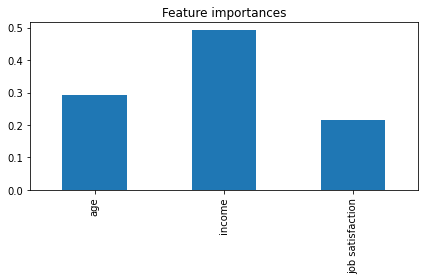

In [274]:
barplot_v3 = pd.Series(importances_v2, index=["age", "income", "job satisfaction"])

fig, ax = plt.subplots()
barplot_v3.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

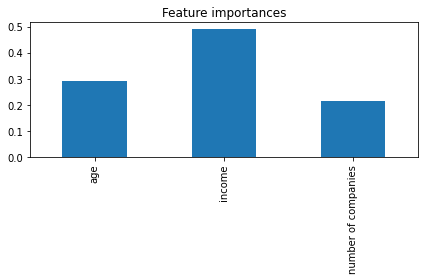

In [273]:
barplot_v4 = pd.Series(importances_v2, index=["age", "income", "number of companies"])

fig, ax = plt.subplots()
barplot_v4.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

### Discussion

According to the results obtained in the previous section, I can conclude that the most accurate prediction is obtained by the age, monthly income, and distance from home features. The accurancy of the corresponding model achieves 88%. This result seems reasonable to me since long distance to work indeed may cause inconvience and people are prone to change a job for the one that locates closer to their place. Plotting the bar chart for that model also shows, that the contribution of each feature in explaining the target variable does not differ dramatically.

Using the Random Forest Model with job satisfaction produces the better accuracy score of 87% compared to the initial model's accuracy of 75%. However, the job satisfaction variable contributes to explaining the target variable the same as the the environmental satisfaction variable (6%).


Finally, creating the Random Forest Model with the number-of-companies-worked-at results in the accuracy of 86%. The feature itself has the importance value of 10%. Thus, I can conclude this variable is better predictor than the intial one (environment satisfaction). The potential explanation is that people who have already changed several companies are more likely to finally find the right place and appropriate job and thus are less likely to quit than those who worked only for one company.

## Conclusion

I have started this paper by exploring and describing the data. After getting a grasp of the dataset, I have intitally stated the research question asking which factors have the highest influence on the employee attrition variable. Aftewards, I have built the following hypothesis: "Monthly income, environment satisfaction, and age are main features that indicate whether the employee will leave a job".

To test my hypothesis, I first visualized and preprocessed my data. Data preprocessing included handling missing values and removing outliers. After that, I fitted my model into a RandomForestClassifier object. While investigating the results that initial model produced, I have found out that one of the variable, namely environment satisfaction, has a low feature importance value.

Furthermore, I have explored the importance of other relevant features from the dataset. During the exploration, I have found out that the distance-from-home and number-of-companies-worked-at are actually even better predictors of attrition than environment satisfaction. Additionally, I observed that the most accurate prediction was obtained by the combination of the following three variables: age, monthly income, and distance from home. Hence, my initial hypothesis was only partly valid. This data analysis also implies that monthly income is the best predictor of attrition rate, followed by an age of an employee.

## References

Grant, R. (2019) Data Visualization - Charts, Maps, and Interactive Graphics. Taylor & Francis Group, LLC.